In [ ]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import logging

In [2]:
sys.path.append(r'C:\Fatigue_level')
data_path = r'C:\Fatigue_level\Data\Raw_Data\human_decision_fatigue_dataset.csv'

In [ ]:
# file_name = r'C:\Fatigue_level\Logging\data_analysis.log'

# logging.basicConfig(
#     filename=r'C:\Fatigue_level\Logging\data_analysis.log',
#     filemode='a',
#     level=logging.INFO,
#     format='%(asctime)s-%(levelname)s-%(message)s'
# )
# logging.info('Data Analysis boshlandi')

In [27]:
logger = logging.getLogger("data_analysis")
logger.setLevel(logging.INFO)

handler = logging.FileHandler(r'C:\Fatigue_level\Logging\data_analysis.log')
formatter = logging.Formatter('%(asctime)s-%(levelname)s-%(message)s')
handler.setFormatter(formatter)
logger.propagate=False
logger.addHandler(handler)

logger.info("Data Analysis boshlandi")

In [28]:
from src.data_loader import Data_Loader

loader = Data_Loader(data_path)
df = loader.data_loader()

In [29]:
df.head()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Time_of_Day,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score,Fatigue_Level,System_Recommendation
0,7,28,7,2.30,5.8,Evening,0,2.4,0.000,2.6,15.6,Low,Continue
1,15,77,22,3.65,4.5,Afternoon,3,1.9,0.143,4.5,97.3,High,Take Break
2,11,57,23,3.67,6.8,Night,2,2.1,0.000,4.1,55.4,Moderate,Slow Down
3,8,39,10,2.39,5.3,Afternoon,1,1.0,0.000,2.3,29.7,Low,Continue
4,7,46,16,3.05,8.2,Night,1,2.8,0.000,3.9,19.1,Low,Continue


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hours_Awake             25000 non-null  int64  
 1   Decisions_Made          25000 non-null  int64  
 2   Task_Switches           25000 non-null  int64  
 3   Avg_Decision_Time_sec   25000 non-null  float64
 4   Sleep_Hours_Last_Night  25000 non-null  float64
 5   Time_of_Day             25000 non-null  str    
 6   Caffeine_Intake_Cups    25000 non-null  int64  
 7   Stress_Level_1_10       25000 non-null  float64
 8   Error_Rate              25000 non-null  float64
 9   Cognitive_Load_Score    25000 non-null  float64
 10  Decision_Fatigue_Score  25000 non-null  float64
 11  Fatigue_Level           25000 non-null  str    
 12  System_Recommendation   25000 non-null  str    
dtypes: float64(6), int64(4), str(3)
memory usage: 2.5 MB


Distribution of fatigue score

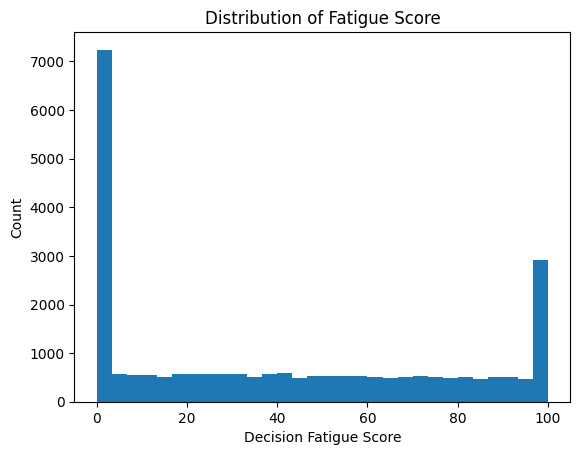

In [31]:
try:
    plt.hist(df['Decision_Fatigue_Score'], bins=30)
    plt.xlabel('Decision Fatigue Score')
    plt.ylabel('Count')
    plt.title('Distribution of Fatigue Score')
    plt.show()

    logger.info('Visualization of Fatigue Distribution is done')
except Exception as e:
    logger.error(f'Visualization of Distribution of Fatigue Score is not done')

Fatigue level counts

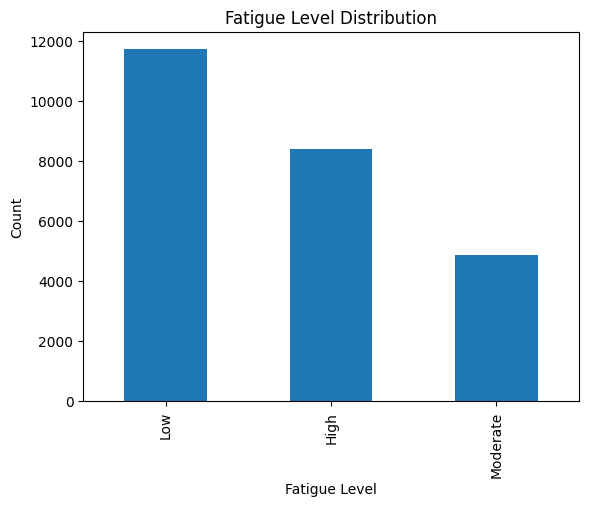

In [32]:
try: 
    df['Fatigue_Level'].value_counts().plot(kind='bar')
    plt.xlabel('Fatigue Level')
    plt.ylabel('Count')
    plt.title('Fatigue Level Distribution')
    plt.show()
    logger.info('Visualizaton of Fatigue level counts is DONE')
except Exception as e:
    logger.error(f'Visualizaton of Fatigue level counts is NOT DONE:{e}')



Hours awake vs fatigue

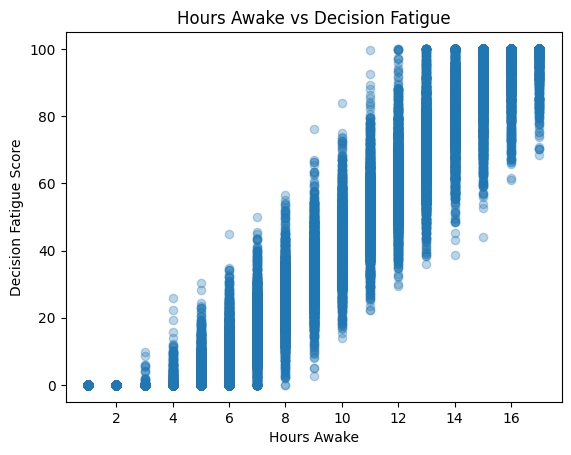

In [33]:
try:
    plt.scatter(df['Hours_Awake'], df['Decision_Fatigue_Score'], alpha=0.3)
    plt.xlabel('Hours Awake')
    plt.ylabel('Decision Fatigue Score')
    plt.title('Hours Awake vs Decision Fatigue')
    plt.show()
    logger.info('Visualization of Hours awake vs fatigue is DONE')
except Exception as e:
    logger.error(f'Visualization of Hours awake vs fatigue is DONE: {e}')

Sleep vs fatigue

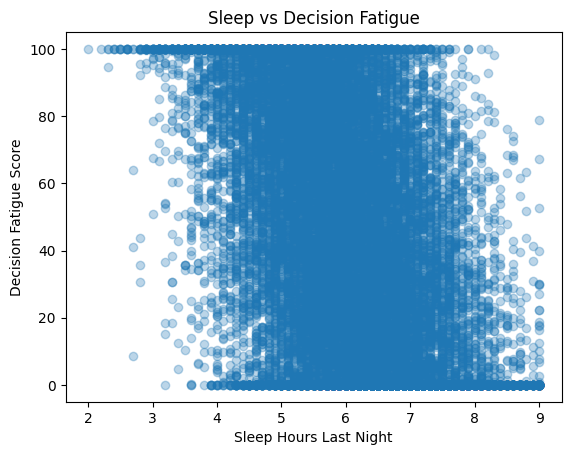

In [34]:
try: 
    plt.scatter(df['Sleep_Hours_Last_Night'], df['Decision_Fatigue_Score'], alpha=0.3)
    plt.xlabel('Sleep Hours Last Night')
    plt.ylabel('Decision Fatigue Score')
    plt.title('Sleep vs Decision Fatigue')
    plt.show()
    logger.info('Visualization of Sleep vs fatigue is DONE')
except Exception as e: 
    logger.error(f'Visualization of Sleep vs fatigue is NOT DONE:{e}')


Stress vs error rate

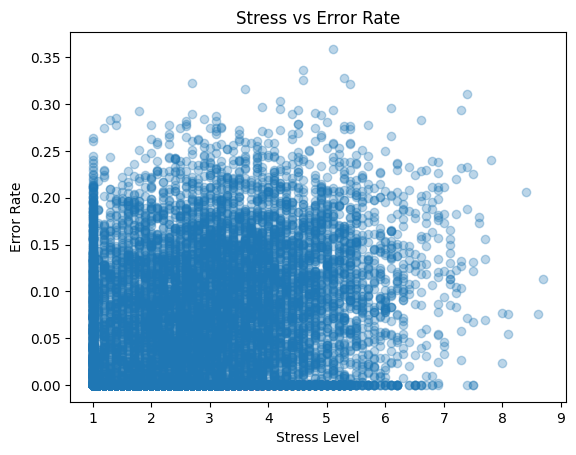

In [35]:
# Stress vs error rate

try:
    plt.scatter(df['Stress_Level_1_10'], df['Error_Rate'], alpha=0.3)
    plt.xlabel('Stress Level')
    plt.ylabel('Error Rate')
    plt.title('Stress vs Error Rate')
    plt.show()
    logger.info('Visualization of Stress vs error rate is DONE')

except Exception as e:
    logger.error(f'Visualization of Stress vs error rate is NOT DONE: {e}')


Heatmap

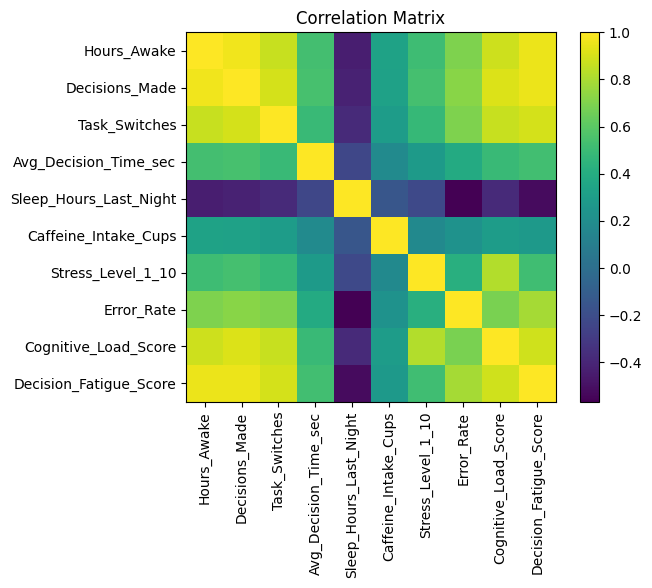

In [36]:
import numpy as np

corr = df.select_dtypes(include=np.number).corr()
try:

    plt.imshow(corr)
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title('Correlation Matrix')
    plt.show()
    logger.info('Heatmap is DONE to find correlation')
except Exception as e:
    logger.error(f'Heatmap is NOT DONE to find correlation')
